<a href="https://colab.research.google.com/github/kevinnjaison/nodeclone/blob/main/machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Prediction of Fuel Emission in Cities using Multiple Linear Regression

### Importing Libraries

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

### Loading The Dataset

In [11]:
df=pd.read_csv("/content/cars.csv")
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


### Understanding the dataset

In [12]:
df.select_dtypes(include='number').describe()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,145.632191,127.825847,144.012411,5.519110,17.275808,24.125493,2010.867612,270.499409,272.707250
std,62.125026,77.358295,79.925899,0.845637,4.479485,6.488293,0.782951,95.293537,100.123328
min,1.000000,2.000000,1.000000,4.000000,8.000000,11.000000,2009.000000,100.000000,98.000000
25%,104.000000,60.000000,62.000000,5.000000,14.000000,20.000000,2010.000000,190.000000,187.000000
50%,152.000000,128.000000,158.000000,6.000000,17.000000,24.000000,2011.000000,266.000000,260.000000
75%,193.000000,198.000000,219.000000,6.000000,20.000000,28.000000,2011.000000,317.000000,335.000000
max,255.000000,255.000000,254.000000,8.000000,38.000000,223.000000,2012.000000,638.000000,774.000000


In [13]:
df.select_dtypes(include='object').describe()

,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Transmission,Fuel Information.Fuel Type,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year
count,5076,5076,5076,5076,5076,5076,5076,5076
unique,4,535,11,4,2,5030,47,918
top,Rear-wheel drive,Chevrolet 6.2L 8 Cylinder 430 hp 424 ft-lbs,6 Speed Automatic Select Shift,Gasoline,Automatic transmission,2010 Mercedes-Benz R350 BlueTEC 4Matic,Chevrolet,2011 Ford F-150
freq,1751,96,1313,4591,3949,3,626,116


In [14]:
df.shape

(5076, 18)

In [15]:
df.ndim

2

In [16]:
df.dtypes

,0
Dimensions.Height,int64
Dimensions.Length,int64
Dimensions.Width,int64
Engine Information.Driveline,object
Engine Information.Engine Type,object
Engine Information.Hybrid,bool
Engine Information.Number of Forward Gears,int64
Engine Information.Transmission,object
Fuel Information.City mpg,int64
Fuel Information.Fuel Type,object


In [17]:
numerical_columns=df.select_dtypes(include='number')

In [18]:
categorical_columns=df.select_dtypes(include='object')
numerical_columns=df.select_dtypes(include='number')


### Data Cleaning

In [19]:
#checking for null values
df.isnull().sum()

,0
Dimensions.Height,0
Dimensions.Length,0
Dimensions.Width,0
Engine Information.Driveline,0
Engine Information.Engine Type,0
Engine Information.Hybrid,0
Engine Information.Number of Forward Gears,0
Engine Information.Transmission,0
Fuel Information.City mpg,0
Fuel Information.Fuel Type,0


In [20]:
duplicate_rows=df.duplicated().sum()
print("Number of Duplicate Rows = ",duplicate_rows)

Number of Duplicate Rows =  18


In [21]:
#removing duplicate rows
df=df.drop_duplicates()
df

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
5,91,17,62,All-wheel drive,Audi 3.2L 6 cylinder 265hp 243 ft-lbs,True,6,6 Speed Manual,16,Gasoline,27,Manual transmission,2009 Audi A5 3.2,Audi,2009 Audi A5,2009,265,243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,13,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX-L,Honda,2012 Honda Pilot,2012,250,253
5072,141,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo Coupe LP 560-4,Lamborghini,2012 Lamborghini Gallardo Coup,2012,552,398
5073,160,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo LP 560-4 Spyder,Lamborghini,2012 Lamborghini Gallardo Spyder,2012,552,398
5074,200,210,110,Rear-wheel drive,BMW 3.0L 6 cylinder 315hp 330 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2012 BMW 740i Sedan,BMW,2012 BMW 7 Series,2012,315,330


In [22]:
df.shape

(5058, 18)

In [23]:
print("Number of Duplicate Rows = ",df.duplicated().sum())

Number of Duplicate Rows =  0


### Handling Outliers


In [24]:
for col in numerical_columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]


In [25]:
df

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
5,91,17,62,All-wheel drive,Audi 3.2L 6 cylinder 265hp 243 ft-lbs,True,6,6 Speed Manual,16,Gasoline,27,Manual transmission,2009 Audi A5 3.2,Audi,2009 Audi A5,2009,265,243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5069,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX,Honda,2012 Honda Pilot,2012,250,253
5070,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot EX 4WD,Honda,2012 Honda Pilot,2012,250,253
5071,13,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX-L,Honda,2012 Honda Pilot,2012,250,253
5074,200,210,110,Rear-wheel drive,BMW 3.0L 6 cylinder 315hp 330 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2012 BMW 740i Sedan,BMW,2012 BMW 7 Series,2012,315,330


In [26]:
df=df.drop(columns='Engine Information.Hybrid')

In [27]:
df

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
5,91,17,62,All-wheel drive,Audi 3.2L 6 cylinder 265hp 243 ft-lbs,6,6 Speed Manual,16,Gasoline,27,Manual transmission,2009 Audi A5 3.2,Audi,2009 Audi A5,2009,265,243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5069,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX,Honda,2012 Honda Pilot,2012,250,253
5070,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot EX 4WD,Honda,2012 Honda Pilot,2012,250,253
5071,13,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX-L,Honda,2012 Honda Pilot,2012,250,253
5074,200,210,110,Rear-wheel drive,BMW 3.0L 6 cylinder 315hp 330 ft-lbs Turbo,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2012 BMW 740i Sedan,BMW,2012 BMW 7 Series,2012,315,330


### Encoding

In [28]:
categorical_columns.nunique()

,0
Engine Information.Driveline,4
Engine Information.Engine Type,535
Engine Information.Transmission,11
Fuel Information.Fuel Type,4
Identification.Classification,2
Identification.ID,5030
Identification.Make,47
Identification.Model Year,918


In [29]:
target='Fuel Information.City mpg'
catcols_target=['Engine Information.Engine Type','Engine Information.Transmission',
                'Identification.ID','Identification.Make','Identification.Model Year']
catcols_onehot=['Engine Information.Driveline','Fuel Information.Fuel Type','Identification.Classification']

for i in catcols_target:
    df[i] = df.groupby(i)[target].transform('mean')



In [30]:
df=pd.get_dummies(df,columns=catcols_onehot)

In [31]:
df

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Engine Type,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.ID,Identification.Make,...,Engine Information.Driveline_All-wheel drive,Engine Information.Driveline_Four-wheel drive,Engine Information.Driveline_Front-wheel drive,Engine Information.Driveline_Rear-wheel drive,Fuel Information.Fuel Type_Compressed natural gas,Fuel Information.Fuel Type_Diesel fuel,Fuel Information.Fuel Type_E85,Fuel Information.Fuel Type_Gasoline,Identification.Classification_Automatic transmission,Identification.Classification_Manual transmission
0,140,143,202,18.000000,6,17.074662,18,25,18.0,17.431034,...,True,False,False,False,False,False,False,True,True,False
1,140,143,202,21.166667,6,17.074662,22,28,22.0,17.431034,...,False,False,True,False,False,False,False,True,True,False
2,140,143,202,21.166667,6,18.868778,21,30,21.0,17.431034,...,False,False,True,False,False,False,False,True,False,True
3,140,143,202,21.166667,6,17.074662,21,28,21.0,17.431034,...,True,False,False,False,False,False,False,True,True,False
5,91,17,62,17.000000,6,18.868778,16,27,16.0,17.431034,...,True,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5069,3,253,201,16.800000,5,15.626340,18,25,18.0,21.800000,...,False,False,True,False,False,False,False,True,True,False
5070,3,253,201,16.800000,5,15.626340,17,24,17.0,21.800000,...,False,True,False,False,False,False,False,True,True,False
5071,13,253,201,16.800000,5,15.626340,18,25,18.0,21.800000,...,False,False,True,False,False,False,False,True,True,False
5074,200,210,110,17.000000,6,17.074662,17,25,17.0,16.489796,...,False,False,False,True,False,False,False,True,True,False


In [32]:
df

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Engine Type,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.ID,Identification.Make,...,Engine Information.Driveline_All-wheel drive,Engine Information.Driveline_Four-wheel drive,Engine Information.Driveline_Front-wheel drive,Engine Information.Driveline_Rear-wheel drive,Fuel Information.Fuel Type_Compressed natural gas,Fuel Information.Fuel Type_Diesel fuel,Fuel Information.Fuel Type_E85,Fuel Information.Fuel Type_Gasoline,Identification.Classification_Automatic transmission,Identification.Classification_Manual transmission
0,140,143,202,18.000000,6,17.074662,18,25,18.0,17.431034,...,True,False,False,False,False,False,False,True,True,False
1,140,143,202,21.166667,6,17.074662,22,28,22.0,17.431034,...,False,False,True,False,False,False,False,True,True,False
2,140,143,202,21.166667,6,18.868778,21,30,21.0,17.431034,...,False,False,True,False,False,False,False,True,False,True
3,140,143,202,21.166667,6,17.074662,21,28,21.0,17.431034,...,True,False,False,False,False,False,False,True,True,False
5,91,17,62,17.000000,6,18.868778,16,27,16.0,17.431034,...,True,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5069,3,253,201,16.800000,5,15.626340,18,25,18.0,21.800000,...,False,False,True,False,False,False,False,True,True,False
5070,3,253,201,16.800000,5,15.626340,17,24,17.0,21.800000,...,False,True,False,False,False,False,False,True,True,False
5071,13,253,201,16.800000,5,15.626340,18,25,18.0,21.800000,...,False,False,True,False,False,False,False,True,True,False
5074,200,210,110,17.000000,6,17.074662,17,25,17.0,16.489796,...,False,False,False,True,False,False,False,True,True,False


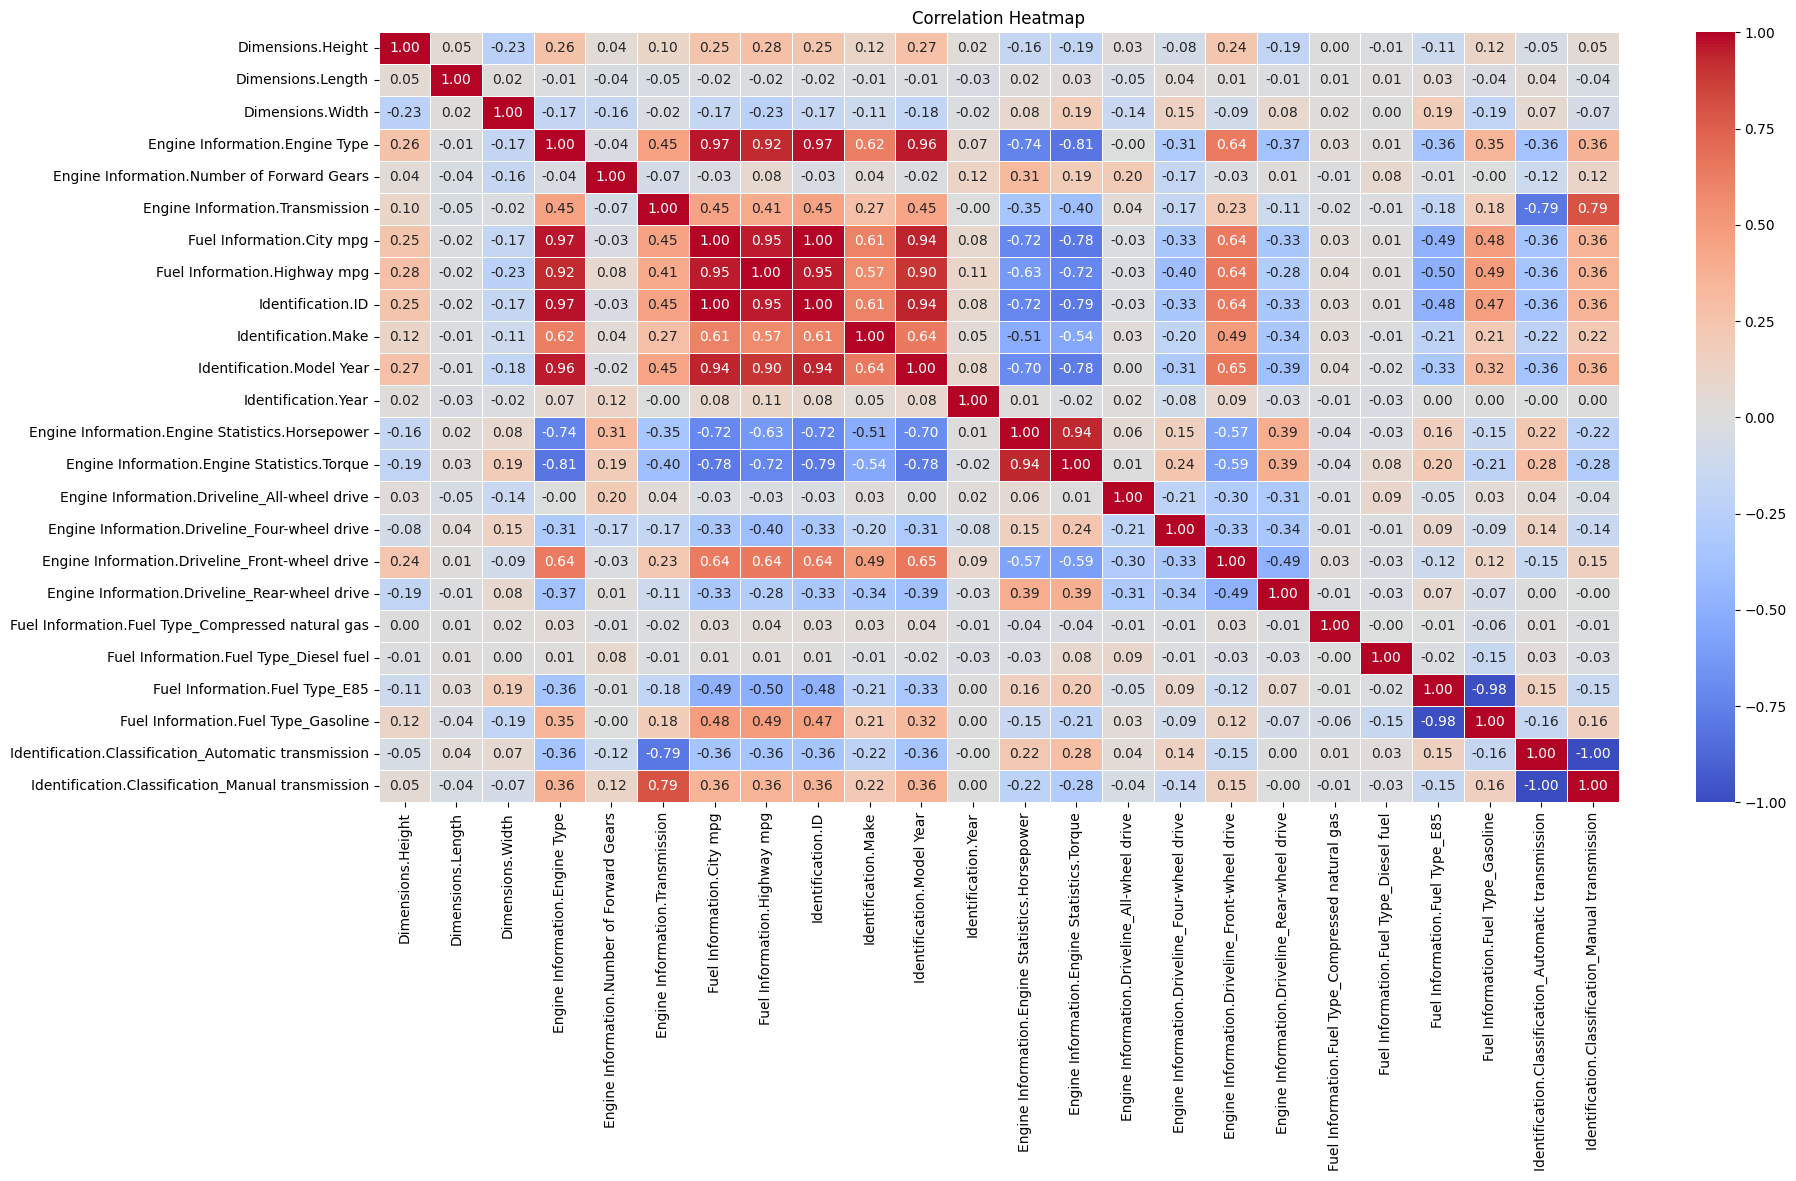

In [33]:
corr_matrix = df.corr()


plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


plt.title('Correlation Heatmap')
plt.show()

### Scaling

In [34]:
scaler=MinMaxScaler()

In [35]:
df[df.select_dtypes(include='number').columns]=scaler.fit_transform(df[df.select_dtypes(include='number').columns])

In [36]:
df

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Engine Type,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.ID,Identification.Make,...,Engine Information.Driveline_All-wheel drive,Engine Information.Driveline_Four-wheel drive,Engine Information.Driveline_Front-wheel drive,Engine Information.Driveline_Rear-wheel drive,Fuel Information.Fuel Type_Compressed natural gas,Fuel Information.Fuel Type_Diesel fuel,Fuel Information.Fuel Type_E85,Fuel Information.Fuel Type_Gasoline,Identification.Classification_Automatic transmission,Identification.Classification_Manual transmission
0,0.545455,0.557312,0.794466,0.463415,0.666667,0.240283,0.476190,0.482759,0.476190,0.424175,...,True,False,False,False,False,False,False,True,True,False
1,0.545455,0.557312,0.794466,0.617886,0.666667,0.240283,0.666667,0.586207,0.666667,0.424175,...,False,False,True,False,False,False,False,True,True,False
2,0.545455,0.557312,0.794466,0.617886,0.666667,0.489321,0.619048,0.655172,0.619048,0.424175,...,False,False,True,False,False,False,False,True,False,True
3,0.545455,0.557312,0.794466,0.617886,0.666667,0.240283,0.619048,0.586207,0.619048,0.424175,...,True,False,False,False,False,False,False,True,True,False
5,0.351779,0.059289,0.241107,0.414634,0.666667,0.489321,0.380952,0.551724,0.380952,0.424175,...,True,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5069,0.003953,0.992095,0.790514,0.404878,0.333333,0.039243,0.476190,0.482759,0.476190,0.712340,...,False,False,True,False,False,False,False,True,True,False
5070,0.003953,0.992095,0.790514,0.404878,0.333333,0.039243,0.428571,0.448276,0.428571,0.712340,...,False,True,False,False,False,False,False,True,True,False
5071,0.043478,0.992095,0.790514,0.404878,0.333333,0.039243,0.476190,0.482759,0.476190,0.712340,...,False,False,True,False,False,False,False,True,True,False
5074,0.782609,0.822134,0.430830,0.414634,0.666667,0.240283,0.428571,0.482759,0.428571,0.362093,...,False,False,False,True,False,False,False,True,True,False


### Feature Selection

In [37]:
df.columns

Index(['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width',
       'Engine Information.Engine Type',
       'Engine Information.Number of Forward Gears',
       'Engine Information.Transmission', 'Fuel Information.City mpg',
       'Fuel Information.Highway mpg', 'Identification.ID',
       'Identification.Make', 'Identification.Model Year',
       'Identification.Year',
       'Engine Information.Engine Statistics.Horsepower',
       'Engine Information.Engine Statistics.Torque',
       'Engine Information.Driveline_All-wheel drive',
       'Engine Information.Driveline_Four-wheel drive',
       'Engine Information.Driveline_Front-wheel drive',
       'Engine Information.Driveline_Rear-wheel drive',
       'Fuel Information.Fuel Type_Compressed natural gas',
       'Fuel Information.Fuel Type_Diesel fuel',
       'Fuel Information.Fuel Type_E85', 'Fuel Information.Fuel Type_Gasoline',
       'Identification.Classification_Automatic transmission',
       'Identification.Classi

### Selecting features using RFE

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

X = df.drop('Fuel Information.City mpg', axis=1)
y = df['Fuel Information.City mpg']

ridge = Ridge()
rfe = RFE(ridge, n_features_to_select=5)  # Select top 5 features
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected Features by RFE:", selected_features)


Selected Features by RFE: Index(['Engine Information.Engine Type', 'Fuel Information.Highway mpg',
       'Identification.ID', 'Identification.Model Year',
       'Fuel Information.Fuel Type_E85'],
      dtype='object')


In [39]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

selected_features = ['Engine Information.Engine Type', 'Fuel Information.Highway mpg',
       'Identification.ID',
       'Identification.Model Year',
       'Fuel Information.Fuel Type_E85']

# Convert selected features to numeric, handling errors
X = df[selected_features].apply(pd.to_numeric, errors='coerce')

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# Calculate VIF for each feature, handling NaN and constant features
vif_data["VIF"] = [variance_inflation_factor(X.astype(float).values, i) #converting to float
                  if (np.isfinite(X.astype(float).values[:, i]).all() and np.var(X.astype(float).values[:, i]) > 0)
                  else np.nan
                  for i in range(X.shape[1])]

print(vif_data)

                          Feature         VIF
0  Engine Information.Engine Type  153.036549
1    Fuel Information.Highway mpg   62.119350
2               Identification.ID  179.245052
3       Identification.Model Year   51.423572
4  Fuel Information.Fuel Type_E85    1.282206


In [40]:
from sklearn.decomposition import PCA
# Extract features with high VIF
high_vif_features = ['Engine Information.Engine Type', 'Fuel Information.Highway mpg']


# Apply PCA
pca = PCA(n_components=1)  # Reduce to a single component
X_pca = pca.fit_transform(df[high_vif_features])

# Create a new column in the DataFrame for the PCA component
df['PCA_Enginetype_highway'] = X_pca

# Drop the original correlated features
df = df.drop(columns=high_vif_features)

print("Transformed DataFrame with PCA feature added:")
df.head()


Transformed DataFrame with PCA feature added:


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,...,Engine Information.Driveline_Four-wheel drive,Engine Information.Driveline_Front-wheel drive,Engine Information.Driveline_Rear-wheel drive,Fuel Information.Fuel Type_Compressed natural gas,Fuel Information.Fuel Type_Diesel fuel,Fuel Information.Fuel Type_E85,Fuel Information.Fuel Type_Gasoline,Identification.Classification_Automatic transmission,Identification.Classification_Manual transmission,PCA_Enginetype_highway
0,0.545455,0.557312,0.794466,0.666667,0.240283,0.476190,0.476190,0.424175,0.555556,0.0,...,False,False,False,False,False,False,True,True,False,0.046236
1,0.545455,0.557312,0.794466,0.666667,0.240283,0.666667,0.666667,0.424175,0.555556,0.0,...,False,True,False,False,False,False,True,True,False,0.229242
2,0.545455,0.557312,0.794466,0.666667,0.489321,0.619048,0.619048,0.424175,0.555556,0.0,...,False,True,False,False,False,False,True,False,True,0.277108
3,0.545455,0.557312,0.794466,0.666667,0.240283,0.619048,0.619048,0.424175,0.555556,0.0,...,False,False,False,False,False,False,True,True,False,0.229242
5,0.351779,0.059289,0.241107,0.666667,0.489321,0.380952,0.380952,0.424175,0.346405,0.0,...,False,False,False,False,False,False,True,False,True,0.058985


In [42]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
selected_features = ['PCA_Enginetype_highway',
       'Identification.ID',
       'Identification.Model Year',
       'Fuel Information.Fuel Type_E85']

# Convert selected features to numeric, handling errors
X = df[selected_features].apply(pd.to_numeric, errors='coerce')

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# Calculate VIF for each feature, handling NaN and constant features
vif_data["VIF"] = [variance_inflation_factor(X.astype(float).values, i) #converting to float
                  if (np.isfinite(X.astype(float).values[:, i]).all() and np.var(X.astype(float).values[:, i]) > 0)
                  else np.nan
                  for i in range(X.shape[1])]

print(vif_data)

                          Feature        VIF
0          PCA_Enginetype_highway   2.122976
1               Identification.ID  45.165115
2       Identification.Model Year  50.004440
3  Fuel Information.Fuel Type_E85   1.673974


In [43]:
from sklearn.decomposition import PCA
# Extract features with high VIF
high_vif_features1 = ['Identification.ID', 'Identification.Model Year']


# Apply PCA
pca = PCA(n_components=1)  # Reduce to a single component
X_pca = pca.fit_transform(df[high_vif_features1])

# Create a new column in the DataFrame for the PCA component
df['PCA_ID_Model Year'] = X_pca

# Drop the original correlated features
df = df.drop(columns=high_vif_features1)

print("Transformed DataFrame with PCA feature added:")
df.head()


Transformed DataFrame with PCA feature added:


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Identification.Make,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,...,Engine Information.Driveline_Front-wheel drive,Engine Information.Driveline_Rear-wheel drive,Fuel Information.Fuel Type_Compressed natural gas,Fuel Information.Fuel Type_Diesel fuel,Fuel Information.Fuel Type_E85,Fuel Information.Fuel Type_Gasoline,Identification.Classification_Automatic transmission,Identification.Classification_Manual transmission,PCA_Enginetype_highway,PCA_ID_Model Year
0,0.545455,0.557312,0.794466,0.666667,0.240283,0.476190,0.424175,0.0,0.3750,0.318707,...,False,False,False,False,False,True,True,False,0.046236,0.143289
1,0.545455,0.557312,0.794466,0.666667,0.240283,0.666667,0.424175,0.0,0.2500,0.251732,...,True,False,False,False,False,True,True,False,0.229242,0.275573
2,0.545455,0.557312,0.794466,0.666667,0.489321,0.619048,0.424175,0.0,0.2500,0.251732,...,True,False,False,False,False,True,False,True,0.277108,0.242502
3,0.545455,0.557312,0.794466,0.666667,0.240283,0.619048,0.424175,0.0,0.2500,0.251732,...,False,False,False,False,False,True,True,False,0.229242,0.242502
5,0.351779,0.059289,0.241107,0.666667,0.489321,0.380952,0.424175,0.0,0.4125,0.334873,...,False,False,False,False,False,True,False,True,0.058985,-0.073337


In [50]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure 'X' is defined correctly
# X = df[['feature1', 'feature2', 'feature3', ...]]

# Step 1: Keep only numeric columns
X = X.select_dtypes(include=[np.number])

# Step 2: Handle missing values
X = X.fillna(X.mean())

# Step 3: Handle infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Step 4: Remove constant columns (zero variance)
X = X.loc[:, X.var() != 0]

# Step 5: Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]

# Print VIF results
print(vif_data)


                  Feature        VIF
0  PCA_Enginetype_highway  23.038936
1       PCA_ID_Model Year  23.038936


In [51]:
from sklearn.decomposition import PCA
# Extract features with high VIF
high_vif_features2 = ['PCA_Enginetype_highway', 'PCA_ID_Model Year']


# Apply PCA
pca = PCA(n_components=1)  # Reduce to a single component
X_pca = pca.fit_transform(df[high_vif_features2])

# Create a new column in the DataFrame for the PCA component
df['PCA_Final'] = X_pca

# Drop the original correlated features
df = df.drop(columns=high_vif_features2)

print("Transformed DataFrame with PCA feature added:")
df.head()


Transformed DataFrame with PCA feature added:


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Identification.Make,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,...,Engine Information.Driveline_Four-wheel drive,Engine Information.Driveline_Front-wheel drive,Engine Information.Driveline_Rear-wheel drive,Fuel Information.Fuel Type_Compressed natural gas,Fuel Information.Fuel Type_Diesel fuel,Fuel Information.Fuel Type_E85,Fuel Information.Fuel Type_Gasoline,Identification.Classification_Automatic transmission,Identification.Classification_Manual transmission,PCA_Final
0,0.545455,0.557312,0.794466,0.666667,0.240283,0.476190,0.424175,0.0,0.3750,0.318707,...,False,False,False,False,False,False,True,True,False,0.135566
1,0.545455,0.557312,0.794466,0.666667,0.240283,0.666667,0.424175,0.0,0.2500,0.251732,...,False,True,False,False,False,False,True,True,False,0.357621
2,0.545455,0.557312,0.794466,0.666667,0.489321,0.619048,0.424175,0.0,0.2500,0.251732,...,False,True,False,False,False,False,True,False,True,0.366755
3,0.545455,0.557312,0.794466,0.666667,0.240283,0.619048,0.424175,0.0,0.2500,0.251732,...,False,False,False,False,False,False,True,True,False,0.333701
5,0.351779,0.059289,0.241107,0.666667,0.489321,0.380952,0.424175,0.0,0.4125,0.334873,...,False,False,False,False,False,False,True,False,True,-0.012311


In [53]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select relevant features
selected_features = ['PCA_Final', 'Fuel Information.Fuel Type_E85']
X = df[selected_features]

# Step 1: Convert all columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Step 2: Handle missing values
X = X.fillna(X.mean())

# Step 3: Handle infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Step 4: Remove constant columns
X = X.loc[:, X.nunique() > 1]

# Step 5: Ensure all values are float
X = X.astype(float)

# Step 6: Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns


### Hence, the features are multicollinear

### Model Training

In [54]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

model=LinearRegression()

X=df[['PCA_Final','Fuel Information.Fuel Type_E85']]
Y=df[['Fuel Information.City mpg']]

model.fit(X,Y)
pred=model.predict(X)

### Calculating R^2 value

In [55]:
from sklearn.metrics import r2_score
r2_score_value = r2_score(Y, pred)
print(r2_score_value)

0.9814751698519412


### Homoscedasticity

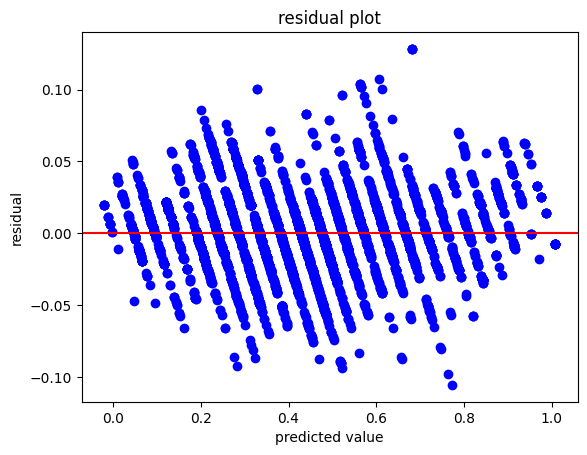

In [56]:
err=Y-pred
plt.scatter(pred,err,color='b')
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('residual plot')
plt.axhline(y=0,color='r')


### Linearity

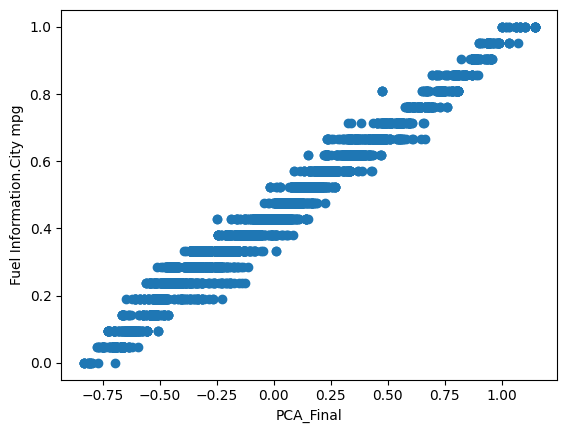

In [57]:
x=df['PCA_Final']
y=df['Fuel Information.City mpg']
plt.xlabel('PCA_Final')
plt.ylabel('Fuel Information.City mpg')
plt.scatter(x,y)

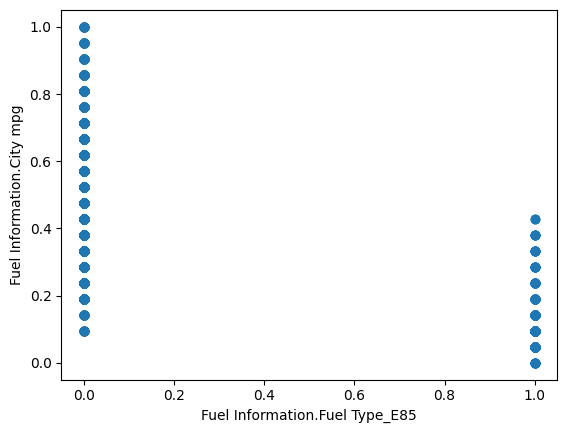

In [58]:
x=df['Fuel Information.Fuel Type_E85']
y=df['Fuel Information.City mpg']
plt.xlabel('Fuel Information.Fuel Type_E85')
plt.ylabel('Fuel Information.City mpg')
plt.scatter(x,y)